In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from typing import List
import matplotlib.pyplot as plt

In [2]:
df = pd.read_json('marketing_sample_for_amazon_com-amazon_fashion_products__20200201_20200430__30k_data.ldjson', lines = True)
df.head()

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,brand,...,colour,no__of_reviews,seller_name,seller_id,left_in_stock,no__of_offers,no__of_sellers,technical_details__k_v_pairs,formats___editions,name_of_author_for_books
0,26d41bdc1495de290bc8e6062d927729,2020-02-07 05:11:36 +0000,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LA' Facon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410c62298852e68f34c35560f2311e5a,2020-02-07 08:45:56 +0000,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52e31bb31680b0ec73de0d781a23cc0a,2020-02-06 11:09:38 +0000,B07WJ6WPN1,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LOVISTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25798d6dc43239c118452d1bee0fb088,2020-02-07 08:32:45 +0000,B07PYSF4WZ,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ad8a5a196d515ef09dfdaf082bdc37c4,2020-02-06 14:27:48 +0000,B082KXNM7X,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968070e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(30000, 33)

In [14]:
attributes = df[['brand', 'sales_price', 'weight', 'rating']].to_numpy()
attributes.shape

(30000, 4)

In [15]:
print(attributes)

[["LA' Facon" 200.0 '999999999' 5.0]
 [nan 265.0 '999999999' 3.6]
 ['LOVISTA' 660.0 '999999999' 3.5]
 ...
 [nan 399.0 '999999999' 4.0]
 ['PINKY PARI' 799.0 '999999999' 4.0]
 ['Gutsy' 359.0 '999999999' 4.0]]


In [26]:
df.to_csv('amazon_fashion.csv', columns=['uniq_id', 'brand', 'sales_price', 'weight', 'rating'], index=False)

In [22]:
df.head()

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,brand,...,colour,no__of_reviews,seller_name,seller_id,left_in_stock,no__of_offers,no__of_sellers,technical_details__k_v_pairs,formats___editions,name_of_author_for_books
0,26d41bdc1495de290bc8e6062d927729,2020-02-07 05:11:36 +0000,B07STS2W9T,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LA' Facon,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,410c62298852e68f34c35560f2311e5a,2020-02-07 08:45:56 +0000,B07N6TD2WL,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,52e31bb31680b0ec73de0d781a23cc0a,2020-02-06 11:09:38 +0000,B07WJ6WPN1,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968255e+09,LOVISTA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25798d6dc43239c118452d1bee0fb088,2020-02-07 08:32:45 +0000,B07PYSF4WZ,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968123e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ad8a5a196d515ef09dfdaf082bdc37c4,2020-02-06 14:27:48 +0000,B082KXNM7X,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1.968070e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(30000, 33)

In [27]:
df2 = pd.read_csv('amazon_fashion.csv')
df2.head()

,uniq_id,brand,sales_price,weight,rating
0,26d41bdc1495de290bc8e6062d927729,LA' Facon,200.0,999999999,5.0
1,410c62298852e68f34c35560f2311e5a,NaN,265.0,999999999,3.6
2,52e31bb31680b0ec73de0d781a23cc0a,LOVISTA,660.0,999999999,3.5
3,25798d6dc43239c118452d1bee0fb088,NaN,195.0,999999999,3.0
4,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,1914.0,999999999,5.0


In [28]:
df2.shape

(30000, 5)

In [29]:
df2['weight'].unique()

array(['999999999', '99.8 g', '240 g', '249 g', '86.2 g', '213 g',
       '118 g', '200 g', '150 g', '159 g', '449 g', '399 g', '40.8 g',
       '172 g', '322 g', '454 g', '272 g', '191 g', '649 g', '376 g',
       '476 g', '181 g', '277 g', '299 g', '281 g', '9.07 g', '113 g',
       '454 Grams', '68 g', '4.54 g', '349 g', '109 g', '59 g', '1.4 Kg',
       '177 g', '390 g', '404 g', '381 g', '431 g', '499 g', '490 g',
       '576 g', '290 g', '703 g', '49.9 g', '90.7 g', '422 g', '195 g',
       '231 g', '236 g', '222 g', '77.1 g', '227 g', '68 Grams', '81.6 g',
       '100 Grams', '165 Grams', '676 g', '340 g', '27.2 g', '127 g',
       '141 Grams', '63.5 g', '599 g', '168 g', '249 Grams', '286 g',
       '540 g', '998 g', '259 g', '45.4 g', '13.6 g', '372 g', '839 g',
       '581 g', '141 g', '517 Grams', '2.36 Kg', '90 Grams', '22.7 g',
       '18.1 g', '136 g', '209 g', '354 g', '481 g', '458 g', '231 Grams',
       '472 g',
       'The Slim N Lift slimming shirt even smoothest ou

In [30]:
df2.isnull().sum()

uniq_id           0
brand          8149
sales_price    2890
weight            0
rating            0
dtype: int64

In [34]:
df2['sales_price'].unique().sum()

array(['26d41bdc1495de290bc8e6062d927729',
       '410c62298852e68f34c35560f2311e5a',
       '52e31bb31680b0ec73de0d781a23cc0a', ...,
       '45ea7c463997f4cd91851617edbfee32',
       '2ecada524df6ff8c2d0c53a249cfcddc',
       'a4e77b9b1addb68bdfc4b178ac27e7c2'], dtype=object)

In [35]:
df2['brand'].fillna('Unknown', inplace = True)
df2.isnull().sum()

uniq_id           0
brand             0
sales_price    2890
weight            0
rating            0
dtype: int64

In [36]:
df2.head()

,uniq_id,brand,sales_price,weight,rating
0,26d41bdc1495de290bc8e6062d927729,LA' Facon,200.0,999999999,5.0
1,410c62298852e68f34c35560f2311e5a,Unknown,265.0,999999999,3.6
2,52e31bb31680b0ec73de0d781a23cc0a,LOVISTA,660.0,999999999,3.5
3,25798d6dc43239c118452d1bee0fb088,Unknown,195.0,999999999,3.0
4,ad8a5a196d515ef09dfdaf082bdc37c4,Unknown,1914.0,999999999,5.0


In [38]:
df2['rating'].unique()

array([5. , 3.6, 3.5, 3. , 4.1, 3.7, 2.9, 4.4, 3.8, 2.5, 4. , 4.5, 3.3,
       3.2, 3.1, 4.2, 4.3, 4.7, 3.9, 3.4, 4.6, 2. , 1. , 4.8, 2.8, 4.9,
       2.2, 2.4, 2.6, 2.7, 2.3, 1.9, 1.5, 2.1, 1.8, 1.6, 1.4, 1.7, 1.3])

In [41]:
df2[df2['weight'] == 'The Slim N Lift slimming shirt even smoothest out your back for a lean tapered appearance. Now you can look inches smaller and pound thinner without exercise']

,uniq_id,brand,sales_price,weight,rating
2130,e2336dc5b83858f3da473297e96acb57,TRENDBUY,499.0,The Slim N Lift slimming shirt even smoothest ...,3.0


In [42]:
df2[df2['brand'] == 'TRENDBUY']

,uniq_id,brand,sales_price,weight,rating
2130,e2336dc5b83858f3da473297e96acb57,TRENDBUY,499.0,The Slim N Lift slimming shirt even smoothest ...,3.0


In [43]:
df2['brand'].unique().sum()

'LA\' FaconUnknownLOVISTAForest ClubPrintOctopusCaraherePeppermintHaase UnlimitedJevi PrintsOLLIMiss ChasebebeColt by UnlimitedC9PuJoyWinza Designerkalpit creationsPoopluJORKKnauti nati7 ate 9 ApparelVimlonAlivenGOLDSTROMSCalvin Klein JeansPari SinghChicNChicTEXCODHRUVI TRENDZbluehaaatMAGSONArrow New YorkVetrokartRangeelo rajasthanLEADING LADYRIGOEDGEMETERSWORNOFSaheliararsHot WheelsRupa ThermocotAai shree khodiyar artGenericSimplicityLincy fashionMaxClauraCAVALLO by Linen ClubRodenSEALINFVinay\'sStormbornVIPNYFASHION101Usi universalFlorsheimHudson babySCHHangout HubAarikaExcalibur by UnlimitedAthflexC.CozamiLinkin Park by Free AuthorityForeverSilly PunterBIBARed EyeLOVIENALOPAEnchanted DrapesKEOTIforever 9teenFABRIZIAWonderWinkIRYAMashaTrendsBlueHUETRAPALENACHILD COTTAGECoco ReefMIMOSADollar BigbossParamountALC CreationDrapesFunbaseJohn MillerVARKALA SILK SAREESABOFSofraMcHenryMATCH MUCHGini & JonyGOWRI MARKETINGRupa JonE4hatsUrban Ranger by PantaloonsLuke and LillybioworldBSTORIESJ2J

In [44]:
df2['brand'].unique()

array(["LA' Facon", 'Unknown', 'LOVISTA', ..., 'Adya',
       'sareesfancy designer', 'Steps of doe'], dtype=object)

In [45]:
df2['brand'].nunique()

6456

In [46]:
df2['brand'] = df2['brand'].str.lower()
df2.head()

,uniq_id,brand,sales_price,weight,rating
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,999999999,5.0
1,410c62298852e68f34c35560f2311e5a,unknown,265.0,999999999,3.6
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,999999999,3.5
3,25798d6dc43239c118452d1bee0fb088,unknown,195.0,999999999,3.0
4,ad8a5a196d515ef09dfdaf082bdc37c4,unknown,1914.0,999999999,5.0


In [47]:
df2['brand'].nunique()

6336

In [48]:
df2[df2['brand'] == 'trendbuy']

,uniq_id,brand,sales_price,weight,rating
2130,e2336dc5b83858f3da473297e96acb57,trendbuy,499.0,The Slim N Lift slimming shirt even smoothest ...,3.0


In [49]:
df2[df2['brand'] == "la' facon"]

,uniq_id,brand,sales_price,weight,rating
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,999999999,5.0
10141,2d249ce6637640fe9ef8a5cf20cbc9dc,la' facon,200.0,999999999,3.0
18915,4188c32471f46876ed222dfcae360791,la' facon,200.0,999999999,5.0


In [50]:
df2[df2['weight'] == '458.0 \xa0grams']

,uniq_id,brand,sales_price,weight,rating
21775,a9619c4786e7f25777e57ebeb7375799,royal,3522.0,458.0 grams,5.0


In [51]:
import re

def normalize_weights(weight):
    outlier = 'The Slim N Lift slimming shirt even smoothest out your back for a lean tapered appearance. Now you can look inches smaller and pound thinner without exercise'
    if pd.isnull(weight) or weight == '999999999' or weight == outlier:
        return np.nan
    weight = str(weight).strip().lower()
    tokens = weight.split(" ")
    if tokens[1] == 'kg' or tokens[1] == 'kilograms':
        return float(tokens[0]) * 1000
    elif tokens[1] == 'g' or tokens[1] == 'grams' or tokens[1] == '\xa0grams':
        return float(tokens[0])

df2['weight'] = df2['weight'].apply(normalize_weights)
df2.head()

,uniq_id,brand,sales_price,weight,rating
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,NaN,5.0
1,410c62298852e68f34c35560f2311e5a,unknown,265.0,NaN,3.6
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,NaN,3.5
3,25798d6dc43239c118452d1bee0fb088,unknown,195.0,NaN,3.0
4,ad8a5a196d515ef09dfdaf082bdc37c4,unknown,1914.0,NaN,5.0


In [214]:
df2['weight'].dtype
df2[df2['weight'] == '99.8 g']

,uniq_id,brand,sales_price,weight,rating


In [53]:
df2['weight'].fillna(df['weight'].median(), inplace = True)
df2.head()

TypeError: could not convert string to float: '99.8 g'

In [56]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [57]:
df2[~df2['weight'].apply(is_float)]

,uniq_id,brand,sales_price,weight,rating


In [58]:
df2.shape

(30000, 5)

In [59]:
df.isnull().sum()

uniq_id                              0
crawl_timestamp                      0
asin                                 0
product_url                          0
product_name                         0
image_urls__small                    2
medium                               2
large                             1159
browsenode                         520
brand                             8143
sales_price                       2890
weight                               0
rating                               0
sales_rank_in_parent_category     4503
sales_rank_in_child_category      5149
delivery_type                        0
meta_keywords                        0
amazon_prime__y_or_n                 0
parent___child_category__all      4503
best_seller_tag__y_or_n              0
other_items_customers_buy         5637
product_details__k_v_pairs        1183
discount_percentage              15376
colour                           23971
no__of_reviews                   26548
seller_name              

In [60]:
df.to_csv('amazon_fashion_updated.csv', columns=['uniq_id', 'brand', 'sales_price', 'weight', 'rating', 'product_url', 'product_name'], index=False)

In [61]:
df3 = pd.read_csv('amazon_fashion_updated.csv')

In [62]:
df3.head()

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
0,26d41bdc1495de290bc8e6062d927729,LA' Facon,200.0,999999999,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...
1,410c62298852e68f34c35560f2311e5a,NaN,265.0,999999999,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...
2,52e31bb31680b0ec73de0d781a23cc0a,LOVISTA,660.0,999999999,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...
3,25798d6dc43239c118452d1bee0fb088,NaN,195.0,999999999,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt
4,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,1914.0,999999999,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...


In [63]:
df3['brand'] = df3['brand'].str.lower()
df3.head()

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,999999999,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...
1,410c62298852e68f34c35560f2311e5a,NaN,265.0,999999999,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,999999999,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...
3,25798d6dc43239c118452d1bee0fb088,NaN,195.0,999999999,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt
4,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,1914.0,999999999,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...


In [70]:
df3[df3['brand'] == 'monte carlo']

,uniq_id,brand,sales_price,weight,rating,product_url,product_name


In [66]:
df2['brand'].nunique()

6336

In [71]:
df3.head(20)

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,999999999,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...
1,410c62298852e68f34c35560f2311e5a,NaN,265.0,999999999,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,999999999,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...
3,25798d6dc43239c118452d1bee0fb088,NaN,195.0,999999999,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt
4,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,1914.0,999999999,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...
5,73fd23f631d4434fd4a41ecc1b9f5eed,forest club,350.0,999999999,4.1,https://www.amazon.in/Forest-Club-Sports-Breat...,Forest Club | Gym Wear | Sports Shorts| Shorts...
6,14d7d34c3cacd6c9ed1aa57f284e37ad,printoctopus,288.0,99.8 g,3.7,https://www.amazon.in/Graphic-Printed-T-Shirt-...,PrintOctopus Graphic Printed T-Shirt for Men C...
7,ab393329c3a9370dc4cc89db35fbcd3a,NaN,919.0,999999999,2.9,https://www.amazon.in/Pepe-Jeans-Regular-Casua...,Pepe Jeans Men's Solid Regular fit Casual Shirt
8,2b54891e14ebe52431d753aee2addf1f,carahere,NaN,999999999,4.4,https://www.amazon.in/Carahere-Handmade-Pre-Ti...,Carahere Boys Handmade Pre-Tied Classic Polka ...
9,87540e97ddd999f4986e56d964a6399b,peppermint,619.0,999999999,5.0,https://www.amazon.in/Peppermint-Synthetic-lin...,Peppermint Synthetic Dress


In [72]:
df3[df3['brand'] == 'bebe']

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
16,61fa9b0189dad55556b420723b74de2d,bebe,760.0,999999999,4.0,https://www.amazon.in/bebe-Women-Burgundy-Genu...,bebe Women Genuine Leather Slim Belt


In [73]:
brand_stats = df3['brand'].value_counts(ascending = False)
brand_stats

max                            504
generic                        245
biba                           205
mothercare                     156
campus sutra                   150
                              ... 
zaalima fashion with z logo      1
idk                              1
5ive degree                      1
jiyanshi fashion                 1
steps of doe                     1
Name: brand, Length: 6336, dtype: int64

In [74]:
df3[df3['brand'] == 'generic']

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
59,085d442857061ebd14b264bd33393ff4,generic,1490.0,999999999,5.0,https://www.amazon.in/Womens-Chicken-Embellish...,Women's Chicken Embellished/Embroidery Kurta -...
78,13c3bd570c30d79b29cb6f7854e78072,generic,520.0,999999999,5.0,https://www.amazon.in/Summer-T-Shirts-Orange-G...,Summer T-Shirts Blue Orange Green and Peach fo...
218,d93cb2792c439cc270588b9b6a24d919,generic,1450.0,999999999,5.0,https://www.amazon.in/Pretty-Stripe-Dress-Prin...,Stripe Dress for Girls : Princess Bow Skirt by...
249,5affa87d3a18f4d9c8a8125d7c012244,generic,NaN,999999999,5.0,https://www.amazon.in/What-Duck-Black-Printed-...,What The Duck? Black Printed T-Shirt
409,f66f1c6e40d1e9875965df632a5367d1,generic,349.0,999999999,5.0,https://www.amazon.in/Bhagwati-Store-Women-Mas...,Bhagwati Store Cap Cap for Men Women Kids Cap ...
...,...,...,...,...,...,...,...
29703,b55b5801b69370c23d33cf36c45bf4f4,generic,589.0,331 g,4.0,https://www.amazon.in/YOGYATA-Printed-Zipper-P...,Women Hoodie for Winter Wear
29735,da12687d23164eae6b209509b5892035,generic,599.0,999999999,5.0,https://www.amazon.in/Labonya-Collections-Draw...,Labonya Collection's Horse Drawing Painting Pe...
29806,89f3a34802d4e05dc101585ad7bb7c58,generic,1599.0,999999999,5.0,https://www.amazon.in/Generic-Georgette-Materi...,Generic Women's Georgette Salwar Suit (ER10213...
29928,613f0a7e814627b8d7894b512a70388f,generic,399.0,31.8 g,5.0,https://www.amazon.in/Treaso-Cubical-Tie-Belt-...,Treaso Cubical Tie Belt


In [88]:
df4 = df3[df3['brand'].isna()][['uniq_id', 'brand', 'product_name', 'product_url']]

In [89]:
df4.head()

,uniq_id,brand,product_name,product_url
1,410c62298852e68f34c35560f2311e5a,NaN,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...
3,25798d6dc43239c118452d1bee0fb088,NaN,People Men's Printed Regular fit T-Shirt,https://www.amazon.in/People-Printed-Regular-T...
4,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,Monte Carlo Grey Solid Cotton Blend Polo Colla...,https://www.amazon.in/Monte-Carlo-Cotton-Colla...
7,ab393329c3a9370dc4cc89db35fbcd3a,NaN,Pepe Jeans Men's Solid Regular fit Casual Shirt,https://www.amazon.in/Pepe-Jeans-Regular-Casua...
11,2dac466a9aa02a4a51e884f6a917ca8a,NaN,Puma Unisex Tribal Regular Fit T-Shirt,https://www.amazon.in/Puma-Unisex-Regular-T-Sh...


In [90]:
df4.shape

(8149, 4)

In [91]:
puma_rows = df4[df4['product_name'].str.startswith('Puma')]
puma_count = puma_rows.shape[0]
print(puma_count)

219


In [92]:
pepe_jeans_rows = df4[df4['product_name'].str.split().str[:2].apply(lambda x: ' '.join(x)) == 'Pepe Jeans']
pepe_count = pepe_jeans_rows.shape[0]
print(pepe_count)

260


In [93]:
df4.head(30)

,uniq_id,brand,product_name,product_url
1,410c62298852e68f34c35560f2311e5a,NaN,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...
3,25798d6dc43239c118452d1bee0fb088,NaN,People Men's Printed Regular fit T-Shirt,https://www.amazon.in/People-Printed-Regular-T...
4,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,Monte Carlo Grey Solid Cotton Blend Polo Colla...,https://www.amazon.in/Monte-Carlo-Cotton-Colla...
7,ab393329c3a9370dc4cc89db35fbcd3a,NaN,Pepe Jeans Men's Solid Regular fit Casual Shirt,https://www.amazon.in/Pepe-Jeans-Regular-Casua...
11,2dac466a9aa02a4a51e884f6a917ca8a,NaN,Puma Unisex Tribal Regular Fit T-Shirt,https://www.amazon.in/Puma-Unisex-Regular-T-Sh...
14,30d88739e3dd3e12088bd52b238bfd4e,NaN,Pinkmint Women's Multi-Coloured Digital Print ...,https://www.amazon.in/Pinkmint-Womens-Multi-Co...
18,ff5760f75570ad75d20fb1cfe873a8d9,NaN,Pepe Jeans Women's Solid T-Shirt,https://www.amazon.in/Pepe-Jeans-Womens-T-Shir...
39,7e6c5323681cd255afff4c00758742c0,NaN,Tommy Hilfiger Men's Checkered Regular fit Cas...,https://www.amazon.in/TOMMY-HILFIGER-Checkered...
41,df36667d3c0fd25aede0d0f3125569bd,NaN,ONLY Women Casual Dress,https://www.amazon.in/ONLY-Womens-Line-2019659...
43,20f2cfbdf9ad5af6db7b23516e4933ab,NaN,Pepe Jeans Girl's Plain Regular fit T-Shirt,https://www.amazon.in/Pepe-Jeans-Regular-T-Shi...


In [94]:
df4['first_word'] = df4['product_name'].str.split().str[0]
first_word_counts = df4['first_word'].value_counts(ascending = False)
first_word_counts

United         484
US             378
Peter          355
W              327
Amazon         288
              ... 
levis            1
Shubhisha        1
SAIFPRO          1
VASTRAMAY        1
FRIENDSKART      1
Name: first_word, Length: 357, dtype: int64

In [95]:
first_word_counts.values.sum()

8149

In [96]:
len(first_word_counts[first_word_counts > 100])

23

In [144]:
len(first_word_counts[first_word_counts < 5])

209

In [98]:
len(first_word_counts['The'])

TypeError: object of type 'numpy.int64' has no len()

In [99]:
the_rows = df4[df4['product_name'].str.startswith('The')]
the_count = the_rows.shape[0]
print(the_count)

43


In [100]:
df4['product_url'] = df4['product_url'].str.replace('https://www.amazon.in/', '', regex=False)
df4.head()

,uniq_id,brand,product_name,product_url,first_word
1,410c62298852e68f34c35560f2311e5a,NaN,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,Sf-Jeans-Pantaloons-T-Shirt-110048418_Blue_Xx-...,Sf
3,25798d6dc43239c118452d1bee0fb088,NaN,People Men's Printed Regular fit T-Shirt,People-Printed-Regular-T-Shirt-P1C109318URB219...,People
4,ad8a5a196d515ef09dfdaf082bdc37c4,NaN,Monte Carlo Grey Solid Cotton Blend Polo Colla...,Monte-Carlo-Cotton-Collar-Tracksuit/dp/B082KXR...,Monte
7,ab393329c3a9370dc4cc89db35fbcd3a,NaN,Pepe Jeans Men's Solid Regular fit Casual Shirt,Pepe-Jeans-Regular-Casual-PM305906_Orange_Larg...,Pepe
11,2dac466a9aa02a4a51e884f6a917ca8a,NaN,Puma Unisex Tribal Regular Fit T-Shirt,Puma-Unisex-Regular-T-Shirt-85318421_Melon_128...,Puma


In [184]:
df4[df4['first_word'] == "mother"]

,uniq_id,brand,product_name,product_url,first_word


In [102]:
first_word_dict = {}

# Populate the dictionary
for first_word in first_word_counts.index:
    first_word_dict[first_word] = df4[df4['first_word'] == first_word]['product_name'].tolist()
print(first_word_dict)

{'United': ["United Colors of Benetton Men's Baseball Cap", "United Colors of Benetton Baby Girls' Regular Fit Clothing Set", "United Colors of Benetton Baby Girl's Regular fit Trousers", "United Colors of Benetton Girls' Dress", "United Colors of Benetton Men's Solid Brief", "United Colors of Benetton Boys' Plain Regular Fit Shirt", "United Colors of Benetton Men's Printed Regular fit T-Shirt", "United Colors of Benetton Men's Printed Slim Fit Casual Shirt", "United Colors of Benetton Men's Solid Regular Fit Cotton Casual Shirt", "United Colors of Benetton Girls' T-Shirt", "United Colors of Benetton Girl's Regular fit T-Shirt", "United Colors of Benetton Boys' Shirt", "United Colors of Benetton Girl's Plain Regular fit T-Shirt", "United Colors of Benetton Boys' Checkered Regular Fit Shirt", "United Colors of Benetton Men's Plain Slim fit Casual Shirt", "United Colors of Benetton Men's Solid T-Shirt", 'United Colors of Benetton Cotton a-line Dress', "United Colors of Benetton Men's Sol

In [103]:
# Function to find the longest common substring between two strings
def longest_common_substring(s1, s2):
    m = len(s1)
    n = len(s2)
    result = 0
    end = 0
    length = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0:
                length[i][j] = 0
            elif s1[i - 1] == s2[j - 1]:
                length[i][j] = length[i - 1][j - 1] + 1
                if length[i][j] > result:
                    result = length[i][j]
                    end = i - 1
            else:
                length[i][j] = 0
    
    if result == 0:
        return ""
    return s1[end - result + 1:end + 1]

In [104]:
# Function to find the longest common substring among a list of strings
def find_longest_common_substring(strings):
    if not strings:
        return ""
    longest_substr = strings[0]
    for string in strings[1:]:
        longest_substr = longest_common_substring(longest_substr, string)
        if not longest_substr:
            break
    return longest_substr

In [115]:
# Create a new dictionary to store the longest common substring for each key
longest_substring_dict = {}
for key, product_names in first_word_dict.items():
    if len(product_names) > 2:
        longest_substring_dict[key] = find_longest_common_substring(product_names)
    else:
        longest_substring_dict[key] = key

In [119]:
longest_substring_dict['Sf'] = 'Sf Jeans'

In [123]:
longest_substring_dict['W'] = 'W for Woman'

In [128]:
longest_substring_dict['Macroman'] = 'Macroman'

In [131]:
longest_substring_dict['Global'] = 'Global Desi'

In [139]:
longest_substring_dict['U.S.Polo'] = 'US Polo Association'

In [140]:
longest_substring_dict['US'] = 'US Polo Association'

In [142]:
longest_substring_dict['FCUK'] = 'FCUK'

In [236]:
longest_substring_dict['TUCUTE'] = 'TUCUTE'
longest_substring_dict['Akkriti'] = 'Akkriti'
longest_substring_dict['Amazon'] = 'Amazon Brand'
longest_substring_dict['2Go'] = '2Go'
longest_substring_dict['Hopcara®'] = 'Hopcara®'
longest_substring_dict['ESNINO'] = 'ESNINO'
longest_substring_dict['Pepe'] = 'Pepe Jeans'
longest_substring_dict['Trishaa'] = 'Trishaa By Pantaloons'
longest_substring_dict['FLYING'] = 'Flying Machine '
longest_substring_dict['Nautica-'] = 'Nautica'
longest_substring_dict["Men's"] = 'generic'
longest_substring_dict["Arrow"] = 'Arrow'
longest_substring_dict["People"] = 'People'
longest_substring_dict["Van"] = 'Van Heusen'
longest_substring_dict["KILLER"] = 'KILLER'
longest_substring_dict["ZEYO"] = 'ZEYO'
longest_substring_dict["MsFQ"] = 'MsFQ'
longest_substring_dict["The"] = "The Children's Place"
longest_substring_dict["Lee"] = "Lee Cooper"
longest_substring_dict["Clovia"] = "Clovia"

In [237]:
print(longest_substring_dict)

{'United': 'United Colors of Benetton ', 'US': 'US Polo Association', 'Peter': 'Peter England ', 'W': 'W for Woman', 'Amazon': 'Amazon Brand', 'Pepe': 'Pepe Jeans', 'Flying': 'Flying Machine ', 'Cherokee': 'Cherokee ', 'Jockey': 'Jockey ', 'Puma': 'Puma ', 'Arrow': 'Arrow', 'People': 'People', 'Aurelia': "Aurelia Women's ", 'Lee': 'Lee Cooper', 'Rangmanch': 'y Pantaloons Women', 'Rangriti': 'Rangriti ', 'Park': 'Park Avenue ', 'Jack': "Jack & Jones Men's ", 'Van': 'Van Heusen', 'blackberrys': 'blackberrys ', 'Raymond': 'Raymond ', 'Jaipur': 'Jaipur Kurti ', '612': '612 League ', 'VERO': 'VERO MODA ', 'ONLY': 'ONLY', 'Allen': 'Allen Solly ', 'Janasya': "Janasya Women's ", 'Marks': 'Marks & Spencer ', "Levi's": "Levi's ", 'John': 'John Players ', 'Parx': 'Parx ', 'Styleville.in': 'Styleville.in ', 'Spykar': 'Spykar ', 'Ruggers': 'Ruggers ', 'Scott': 'Scott ', 'Wrangler': 'Wrangler ', 'Indigo': 'Indigo ', 'TOMMY': 'TOMMY HILFIGER ', 'Karigari': ' Kurta', 'The': "The Children's Place", 'Ch

In [238]:
df4['brand'] = df4['first_word'].map(longest_substring_dict)

In [239]:
df4.head(20)

,uniq_id,brand,product_name,product_url,first_word
1,410c62298852e68f34c35560f2311e5a,Sf Jeans,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,Sf-Jeans-Pantaloons-T-Shirt-110048418_Blue_Xx-...,Sf
3,25798d6dc43239c118452d1bee0fb088,People,People Men's Printed Regular fit T-Shirt,People-Printed-Regular-T-Shirt-P1C109318URB219...,People
4,ad8a5a196d515ef09dfdaf082bdc37c4,Monte Carlo,Monte Carlo Grey Solid Cotton Blend Polo Colla...,Monte-Carlo-Cotton-Collar-Tracksuit/dp/B082KXR...,Monte
7,ab393329c3a9370dc4cc89db35fbcd3a,Pepe Jeans,Pepe Jeans Men's Solid Regular fit Casual Shirt,Pepe-Jeans-Regular-Casual-PM305906_Orange_Larg...,Pepe
11,2dac466a9aa02a4a51e884f6a917ca8a,Puma,Puma Unisex Tribal Regular Fit T-Shirt,Puma-Unisex-Regular-T-Shirt-85318421_Melon_128...,Puma
14,30d88739e3dd3e12088bd52b238bfd4e,Pinkmint,Pinkmint Women's Multi-Coloured Digital Print ...,Pinkmint-Womens-Multi-Coloured-Digital-Print/d...,Pinkmint
18,ff5760f75570ad75d20fb1cfe873a8d9,Pepe Jeans,Pepe Jeans Women's Solid T-Shirt,Pepe-Jeans-Womens-T-Shirt-PILK200029_Black_X-L...,Pepe
39,7e6c5323681cd255afff4c00758742c0,Tommy Hilfiger,Tommy Hilfiger Men's Checkered Regular fit Cas...,TOMMY-HILFIGER-Checkered-P8AMW190XL_Maritime-M...,Tommy
41,df36667d3c0fd25aede0d0f3125569bd,ONLY,ONLY Women Casual Dress,ONLY-Womens-Line-201965902_Baroque-Rose_S/dp/B...,ONLY
43,20f2cfbdf9ad5af6db7b23516e4933ab,Pepe Jeans,Pepe Jeans Girl's Plain Regular fit T-Shirt,Pepe-Jeans-Regular-T-Shirt-PIGKK100033_Mint_6/...,Pepe


In [240]:
df4.shape

(8149, 5)

In [241]:
df4.isnull().sum()

uniq_id         0
brand           0
product_name    0
product_url     0
first_word      0
dtype: int64

In [242]:
# Merge df3 and df4 on 'uniq_id' with an outer join to keep all rows from df3
df5 = df3.merge(df4[['uniq_id', 'brand']], on='uniq_id', how='left', suffixes=('', '_df4'))

# Update the 'brand' column in df3 with the values from df4 where there is a difference
df5['brand'] = df5['brand_df4'].combine_first(df5['brand'])

# Drop the temporary 'brand_df4' column
df5.drop(columns=['brand_df4'], inplace=True)

# Display the first few rows of the updated DataFrame to verify the changes
df5.head()

# Save the updated DataFrame to df3
#df3 = merged_df

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,999999999,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...
1,410c62298852e68f34c35560f2311e5a,Sf Jeans,265.0,999999999,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,999999999,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...
3,25798d6dc43239c118452d1bee0fb088,People,195.0,999999999,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt
4,ad8a5a196d515ef09dfdaf082bdc37c4,Monte Carlo,1914.0,999999999,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...


In [243]:
df5.isnull().sum()

uniq_id            0
brand              0
sales_price     2890
weight             0
rating             0
product_url        0
product_name       0
dtype: int64

In [244]:
df5['brand'] = df5['brand'].str.lower()
df5['brand'] = df5['brand'].str.strip()

In [245]:
df5.head()

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,999999999,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...
1,410c62298852e68f34c35560f2311e5a,sf jeans,265.0,999999999,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,999999999,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...
3,25798d6dc43239c118452d1bee0fb088,people,195.0,999999999,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt
4,ad8a5a196d515ef09dfdaf082bdc37c4,monte carlo,1914.0,999999999,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...


In [246]:
df5['brand'].nunique()

6627

In [247]:
df5['weight'].unique()

array(['999999999', '99.8 g', '240 g', '249 g', '86.2 g', '213 g',
       '118 g', '200 g', '150 g', '159 g', '449 g', '399 g', '40.8 g',
       '172 g', '322 g', '454 g', '272 g', '191 g', '649 g', '376 g',
       '476 g', '181 g', '277 g', '299 g', '281 g', '9.07 g', '113 g',
       '454 Grams', '68 g', '4.54 g', '349 g', '109 g', '59 g', '1.4 Kg',
       '177 g', '390 g', '404 g', '381 g', '431 g', '499 g', '490 g',
       '576 g', '290 g', '703 g', '49.9 g', '90.7 g', '422 g', '195 g',
       '231 g', '236 g', '222 g', '77.1 g', '227 g', '68 Grams', '81.6 g',
       '100 Grams', '165 Grams', '676 g', '340 g', '27.2 g', '127 g',
       '141 Grams', '63.5 g', '599 g', '168 g', '249 Grams', '286 g',
       '540 g', '998 g', '259 g', '45.4 g', '13.6 g', '372 g', '839 g',
       '581 g', '141 g', '517 Grams', '2.36 Kg', '90 Grams', '22.7 g',
       '18.1 g', '136 g', '209 g', '354 g', '481 g', '458 g', '231 Grams',
       '472 g',
       'The Slim N Lift slimming shirt even smoothest ou

In [248]:
df5[df5['weight'] == '999999999']

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,999999999,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...
1,410c62298852e68f34c35560f2311e5a,sf jeans,265.0,999999999,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,999999999,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...
3,25798d6dc43239c118452d1bee0fb088,people,195.0,999999999,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt
4,ad8a5a196d515ef09dfdaf082bdc37c4,monte carlo,1914.0,999999999,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...
...,...,...,...,...,...,...,...
29995,976b6bda7076509778da69eb3fe0f59c,indian virasat,899.0,999999999,5.0,https://www.amazon.in/Indian-Virasat-Pushp-Cha...,Indian Virasat Women's Rayon Anarkali Kurta
29996,3006a520f71804b055d92216f5dc946d,urban ranger by pantaloons,204.0,999999999,3.0,https://www.amazon.in/Urban-Ranger-Pantaloons-...,Urban Ranger by Pantaloons Men's Slim fit T-Shirt
29997,45ea7c463997f4cd91851617edbfee32,peter england,399.0,999999999,4.0,https://www.amazon.in/Peter-England-Striped-Re...,Peter England Men's Regular fit T-Shirt
29998,2ecada524df6ff8c2d0c53a249cfcddc,pinky pari,799.0,999999999,4.0,https://www.amazon.in/PINKY-PARI-Womens-Embroi...,PINKY PARI Women's Embroidered Short Denim Str...


In [249]:
df5['product_name'][df5['brand'] == 'trendbuy']

2130    TRENDBUY Men's Slim Lift Slimming Tummy Trimme...
Name: product_name, dtype: object

In [250]:
df5.shape

(30000, 7)

In [251]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uniq_id       30000 non-null  object 
 1   brand         30000 non-null  object 
 2   sales_price   27110 non-null  float64
 3   weight        30000 non-null  object 
 4   rating        30000 non-null  float64
 5   product_url   30000 non-null  object 
 6   product_name  30000 non-null  object 
dtypes: float64(2), object(5)
memory usage: 1.8+ MB


In [252]:
# Filter rows where 'weight' is equal to "999999999"
filtered_df = df5[df5['weight'] == "999999999"]

# Group by 'brand' and count the occurrences
brand_weight_counts = filtered_df['brand'].value_counts().to_dict()

# Display the dictionary
print(brand_weight_counts)

{'max': 504, 'united colors of benetton': 483, 'us polo association': 380, 'peter england': 355, 'cherokee': 313, 'w for woman': 311, 'amazon brand': 287, 'flying machine': 260, 'pepe jeans': 259, 'puma': 220, 'jockey': 218, 'generic': 210, 'biba': 205, 'arrow': 182, 'people': 172, "aurelia women's": 165, 'lee cooper': 156, 'mothercare': 155, 'soch': 149, 'y pantaloons women': 148, 'rangriti': 137, "jack & jones men's": 134, 'van heusen': 132, 'nauti nati': 132, 'ada': 126, 'blackberrys': 117, '612 league': 106, 'vero moda': 100, 'jaipur kurti': 100, 'only': 99, 'allen solly junior': 93, 'park avenue': 93, 'excalibur by unlimited': 80, 'indian terrain': 80, 'allen solly': 72, 'marks & spencer': 72, 'tommy hilfiger': 70, "levi's": 69, 'gini & jony': 69, 'arrow sports': 68, 'gritstones': 64, 'pooplu': 64, 'columbia': 62, 'john players': 61, 'harpa': 60, 'raymond': 59, 'arrow new york': 58, 'campus sutra': 56, 'duke': 53, 'e4hats': 51, 'styleville.in': 51, 'miss chase': 50, 'ruggers': 49,

In [253]:
# Filter rows where 'weight' is equal to "999999999"
filtered_df2 = df5[df5['weight'] != "999999999"]

# Group by 'brand' and count the occurrences
brand_weight_counts2 = filtered_df2['brand'].value_counts().to_dict()

# Display the dictionary
print(brand_weight_counts2)

{'campus sutra': 94, 'mimosa': 74, 'go all out screenprinting': 61, 'buckle down': 60, 'printoctopus': 55, 'speedy pros': 54, 'raymond': 53, "janasya women's": 51, 'anni designer': 50, 'veirdo': 46, 'varanga': 46, 'gritstones': 46, 'jockey': 43, 'ziyaa': 42, 'park avenue': 41, 'perfectblue': 41, 'generic': 37, 'oomph!': 35, 'my lil princess': 34, 'anand sarees': 32, 'adro': 31, 'all about pinks': 31, 'columbia': 30, 'wild thunder': 29, 'winza designer': 28, 'dan smith': 27, 'applecreation': 26, 'jevi prints': 26, 'ahalyaa': 25, 'fashion and youth': 25, 'quote marshals': 24, 'gosriki': 23, 'rani saahiba': 22, '1 stop fashion': 22, 'urbano fashion': 22, 'vimal jonney': 22, 'clifton': 21, "pistaa's": 21, 'mayra': 20, 'akhilam': 20, 'basiics': 19, 'kanchnar': 19, 'spykar': 19, 'rajnandini': 19, 'kvsfab': 19, 'krystle': 18, 'killer': 18, 'florence': 18, 'bluehaaat': 18, 'sojanya (since 1958)': 17, 'ishin': 17, "zoeyam's": 17, 'huetrap': 17, 'unknown': 16, 'parx': 16, 'w for woman': 16, 'muf

In [254]:
df5.to_csv('updated_file.csv', index = False)

In [255]:
df6 = pd.read_csv('updated_file.csv')

In [268]:
df5['sales_price'].describe()

count    27110.000000
mean       862.172397
std        964.223008
min         39.000000
25%        379.000000
50%        590.000000
75%        899.000000
max       9988.000000
Name: sales_price, dtype: float64

In [271]:
df5[df5['sales_price'].isnull()]
#df5.info()

,uniq_id,brand,sales_price,weight,rating,product_url,product_name
8,2b54891e14ebe52431d753aee2addf1f,carahere,NaN,999999999,4.4,https://www.amazon.in/Carahere-Handmade-Pre-Ti...,Carahere Boys Handmade Pre-Tied Classic Polka ...
10,3ff4c7573b9e673b6ca432608c1969e5,haase unlimited,NaN,999999999,4.4,https://www.amazon.in/Toddler-Little-Straight-...,Toddler Little Boy Straight Outta Timeout Long...
31,8e724efa4103309725237750410b6a2a,pari singh,NaN,999999999,5.0,https://www.amazon.in/fashion-women-short-Oran...,Pari Singh Orange Plain Women's Frok
48,ae539dcfdcdfc223b39e95a4279100f3,edgemeter,NaN,159 g,5.0,https://www.amazon.in/EDGEMETER-Round-Sleeves-...,EDGEMETER Navy Blue Round Neck Half Sleeves So...
58,816b849b974b45b0caea83d02c7648e0,the children's place,NaN,999999999,5.0,https://www.amazon.in/Childrens-Place-Fleece-S...,The Children's Place Boys' Big Fleece Sherpa S...
...,...,...,...,...,...,...,...
29966,f89723bbd7492930225c60bad7c05a2f,buckle down,NaN,109 g,3.4,https://www.amazon.in/white-flower-scroll-patt...,White Flower and Scroll Pattern Suspenders
29978,63cd5178ba17e1d79d068cee7eb67ed6,oakley men's,NaN,999999999,4.4,https://www.amazon.in/Oakley-Mens-Smart-Umber-...,Oakley Men's Smart Cap
29988,81e2289cff5a1dfdd9cc881c868eccca,otto,NaN,999999999,3.8,https://www.amazon.in/OTTO-Pro-Style-Wool-Fitt...,Pro Style Wool Fitted Cap - Black 7-1-4
29993,9be10c40aa7d6d8fdf0b758c66bedc1a,steps of doe,NaN,999999999,5.0,https://www.amazon.in/Steps-of-doe-Women-1-e_M...,Steps of doe Women's Cotton Kurti(1_Multicolou...


In [256]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdif_vecorizer = TfidfVectorizer(stop_words = 'english')
tdif_matrix = tdif_vecorizer.fit_transform(df6['product_name'])
tdif_matrix.shape

(30000, 16481)

In [307]:
from scipy.sparse import hstack
rating_matrix = df6['rating'].values.reshape(-1, 1)
feature_matrix = hstack([tdif_matrix, rating_matrix])
feature_matrix.shape

(30000, 16482)

/Users/arvindverelli/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


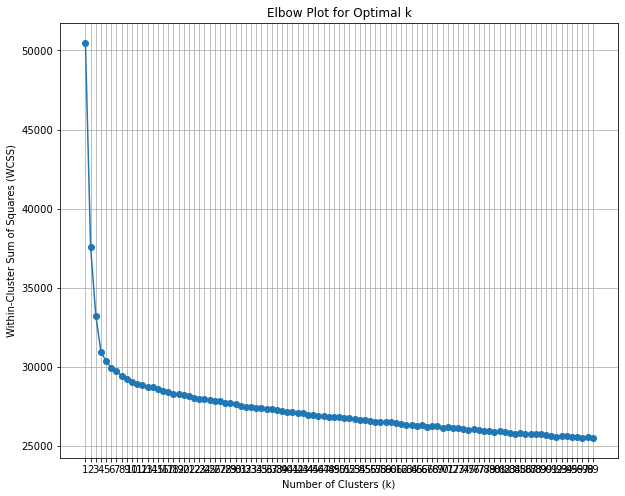

In [308]:
#Elbow plot for optimal K value
from sklearn.cluster import KMeans
wcss = []
#k_values = range(1, 100)
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state = 42)
    kmeans.fit(feature_matrix)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10, 8))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid(True)
#plt.show()

In [309]:
kmeans = KMeans(n_clusters = 5, random_state = 42)
kmeans.fit(feature_matrix)
df6['cluster'] = kmeans.labels_
df6.head()

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,321.248428,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,4
1,410c62298852e68f34c35560f2311e5a,sf jeans,265.0,539.472488,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,0
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,264.726016,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,3
3,25798d6dc43239c118452d1bee0fb088,people,195.0,264.726016,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,3
4,ad8a5a196d515ef09dfdaf082bdc37c4,monte carlo,1914.0,321.248428,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,4


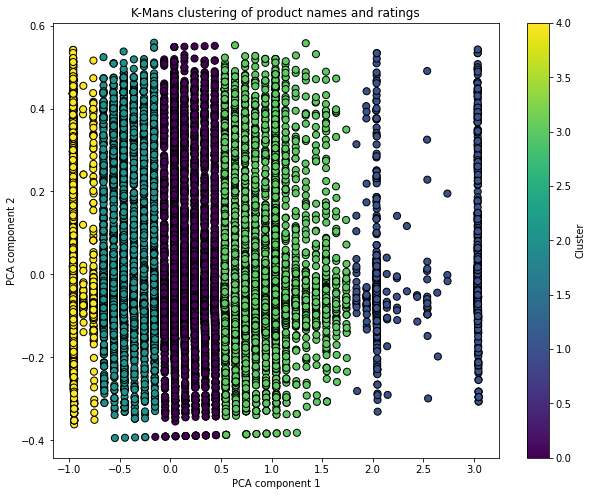

In [259]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components = 2, random_state = 42)
reduced_features = pca.fit_transform(feature_matrix.toarray())

plt.figure(figsize = (10, 8))
plt.scatter(reduced_features[:, 0], reduced_features[:, -1], c = df6['cluster'], cmap = 'viridis', marker = 'o', edgecolor = 'k', s = 50)
plt.title('K-Mans clustering of product names and ratings')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.colorbar(label = 'Cluster')
plt.show()

In [260]:
#function to fill missing sales_price value based on cluster mean
def fill_sales_price(row):
    if pd.isnull(row['sales_price']):
        cluster = row['cluster']
        cluster_mean = df6[df6['cluster'] == cluster]['sales_price'].mean()
        return cluster_mean
    else:
        return row['sales_price']

df6['sales_price'] = df6.apply(fill_sales_price, axis = 1)
df6.head()

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,999999999,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,4
1,410c62298852e68f34c35560f2311e5a,sf jeans,265.0,999999999,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,0
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,999999999,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,3
3,25798d6dc43239c118452d1bee0fb088,people,195.0,999999999,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,3
4,ad8a5a196d515ef09dfdaf082bdc37c4,monte carlo,1914.0,999999999,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,4


In [261]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uniq_id       30000 non-null  object 
 1   brand         30000 non-null  object 
 2   sales_price   30000 non-null  float64
 3   weight        30000 non-null  object 
 4   rating        30000 non-null  float64
 5   product_url   30000 non-null  object 
 6   product_name  30000 non-null  object 
 7   cluster       30000 non-null  int32  
dtypes: float64(2), int32(1), object(5)
memory usage: 1.7+ MB


In [262]:
df6.shape

(30000, 8)

In [264]:
df6['sales_price'].describe()

count    30000.000000
mean       869.184440
std        917.711269
min         39.000000
25%        399.000000
50%        629.000000
75%        967.721067
max       9988.000000
Name: sales_price, dtype: float64

In [272]:
df6[df6['uniq_id'] == '2b54891e14ebe52431d753aee2addf1f']

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
8,2b54891e14ebe52431d753aee2addf1f,carahere,1062.080731,999999999,4.4,https://www.amazon.in/Carahere-Handmade-Pre-Ti...,Carahere Boys Handmade Pre-Tied Classic Polka ...,2


In [273]:
df6['weight'] = df6['weight'].apply(normalize_weights)

In [274]:
df6.head(20)

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.000000,NaN,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,4
1,410c62298852e68f34c35560f2311e5a,sf jeans,265.000000,NaN,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,0
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.000000,NaN,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,3
3,25798d6dc43239c118452d1bee0fb088,people,195.000000,NaN,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,3
4,ad8a5a196d515ef09dfdaf082bdc37c4,monte carlo,1914.000000,NaN,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,4
5,73fd23f631d4434fd4a41ecc1b9f5eed,forest club,350.000000,NaN,4.1,https://www.amazon.in/Forest-Club-Sports-Breat...,Forest Club | Gym Wear | Sports Shorts| Shorts...,0
6,14d7d34c3cacd6c9ed1aa57f284e37ad,printoctopus,288.000000,99.8,3.7,https://www.amazon.in/Graphic-Printed-T-Shirt-...,PrintOctopus Graphic Printed T-Shirt for Men C...,0
7,ab393329c3a9370dc4cc89db35fbcd3a,pepe jeans,919.000000,NaN,2.9,https://www.amazon.in/Pepe-Jeans-Regular-Casua...,Pepe Jeans Men's Solid Regular fit Casual Shirt,3
8,2b54891e14ebe52431d753aee2addf1f,carahere,1062.080731,NaN,4.4,https://www.amazon.in/Carahere-Handmade-Pre-Ti...,Carahere Boys Handmade Pre-Tied Classic Polka ...,2
9,87540e97ddd999f4986e56d964a6399b,peppermint,619.000000,NaN,5.0,https://www.amazon.in/Peppermint-Synthetic-lin...,Peppermint Synthetic Dress,4


In [275]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   uniq_id       30000 non-null  object 
 1   brand         30000 non-null  object 
 2   sales_price   30000 non-null  float64
 3   weight        6254 non-null   float64
 4   rating        30000 non-null  float64
 5   product_url   30000 non-null  object 
 6   product_name  30000 non-null  object 
 7   cluster       30000 non-null  int32  
dtypes: float64(3), int32(1), object(4)
memory usage: 1.7+ MB


In [276]:
def fill_weights(row):
    if pd.isnull(row['weight']):
        cluster = row['cluster']
        cluster_mean = df6[df6['cluster'] == cluster]['weight'].mean()
        return cluster_mean
    else:
        return row['weight']

df6['weight'] = df6.apply(fill_weights, axis = 1)
df6.head()

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.0,321.248428,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,4
1,410c62298852e68f34c35560f2311e5a,sf jeans,265.0,539.472488,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,0
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.0,264.726016,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,3
3,25798d6dc43239c118452d1bee0fb088,people,195.0,264.726016,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,3
4,ad8a5a196d515ef09dfdaf082bdc37c4,monte carlo,1914.0,321.248428,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,4


In [277]:
df6.head(20)

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
0,26d41bdc1495de290bc8e6062d927729,la' facon,200.000000,321.248428,5.0,https://www.amazon.in/Facon-Kalamkari-Handbloc...,LA' Facon Cotton Kalamkari Handblock Saree Blo...,4
1,410c62298852e68f34c35560f2311e5a,sf jeans,265.000000,539.472488,3.6,https://www.amazon.in/Sf-Jeans-Pantaloons-T-Sh...,Sf Jeans By Pantaloons Men's Plain Slim fit T-...,0
2,52e31bb31680b0ec73de0d781a23cc0a,lovista,660.000000,264.726016,3.5,https://www.amazon.in/LOVISTA-Traditional-Prin...,LOVISTA Cotton Gota Patti Tassel Traditional P...,3
3,25798d6dc43239c118452d1bee0fb088,people,195.000000,264.726016,3.0,https://www.amazon.in/People-Printed-Regular-T...,People Men's Printed Regular fit T-Shirt,3
4,ad8a5a196d515ef09dfdaf082bdc37c4,monte carlo,1914.000000,321.248428,5.0,https://www.amazon.in/Monte-Carlo-Cotton-Colla...,Monte Carlo Grey Solid Cotton Blend Polo Colla...,4
5,73fd23f631d4434fd4a41ecc1b9f5eed,forest club,350.000000,539.472488,4.1,https://www.amazon.in/Forest-Club-Sports-Breat...,Forest Club | Gym Wear | Sports Shorts| Shorts...,0
6,14d7d34c3cacd6c9ed1aa57f284e37ad,printoctopus,288.000000,99.800000,3.7,https://www.amazon.in/Graphic-Printed-T-Shirt-...,PrintOctopus Graphic Printed T-Shirt for Men C...,0
7,ab393329c3a9370dc4cc89db35fbcd3a,pepe jeans,919.000000,264.726016,2.9,https://www.amazon.in/Pepe-Jeans-Regular-Casua...,Pepe Jeans Men's Solid Regular fit Casual Shirt,3
8,2b54891e14ebe52431d753aee2addf1f,carahere,1062.080731,551.459166,4.4,https://www.amazon.in/Carahere-Handmade-Pre-Ti...,Carahere Boys Handmade Pre-Tied Classic Polka ...,2
9,87540e97ddd999f4986e56d964a6399b,peppermint,619.000000,321.248428,5.0,https://www.amazon.in/Peppermint-Synthetic-lin...,Peppermint Synthetic Dress,4


In [279]:
df6.to_csv('Final_cleaned_dataset.csv', columns=['uniq_id', 'brand', 'sales_price', 'weight', 'rating'], index = False)

In [301]:
df6[df6['uniq_id'] == '1b8a7af720c99e818ef8dd9e33be44de']

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
28665,1b8a7af720c99e818ef8dd9e33be44de,lee cooper,1000.0,264.726016,3.3,https://www.amazon.in/Lee-Cooper-Mens-Sweatshi...,Lee Cooper Men Sweatshirt,3


In [306]:
df6[df6['uniq_id'] == '4c00f8d0d69cc8e23057954e0d58fc2d']

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
28096,4c00f8d0d69cc8e23057954e0d58fc2d,lee cooper,719.0,264.726016,3.2,https://www.amazon.in/Lee-Cooper-Printed-TS-21...,Lee Cooper Men's Printed Regular Fit T-Shirt,3


In [299]:
df6[df6['brand'] == 'lee cooper']

,uniq_id,brand,sales_price,weight,rating,product_url,product_name,cluster
248,733c18e4bf01e3876447c64932123b77,lee cooper,5423.0,454.000000,2.9,https://www.amazon.in/Lee-Modern-Relaxed-Fit-B...,Lee Men's Modern Series Relaxed Fit Bootcut Jean,3
324,2efe83d1688a9677e556a4080dcfff73,lee cooper,571.0,551.459166,4.3,https://www.amazon.in/Lee-Cooper-Printed-Regul...,Lee Cooper Men's Regular fit T-Shirt,2
340,f16935c3b019157abd1fb9efabe3ec51,lee cooper,899.0,264.726016,3.3,https://www.amazon.in/Lee-Checkered-Casual-Shi...,Lee Men's Checkered Slim Fit Casual Shirt,3
1097,9fec2b991cb188a0e926b18ec3f7ad44,lee cooper,1240.0,256.623026,1.0,https://www.amazon.in/Lee-Cooper-Regular-LCWT4...,Lee Cooper Women's Plain Regular Fit Shirt,1
1099,39d6d5c6160098cea736d7c78fe61d68,lee cooper,384.0,321.248428,5.0,https://www.amazon.in/Lee-Cooper-Regular-T-Shi...,Lee Cooper Girl's Regular fit T-Shirt,4
...,...,...,...,...,...,...,...,...
28665,1b8a7af720c99e818ef8dd9e33be44de,lee cooper,1000.0,264.726016,3.3,https://www.amazon.in/Lee-Cooper-Mens-Sweatshi...,Lee Cooper Men Sweatshirt,3
28772,3ee624f2e9af65903a7c36877645a38b,lee cooper,399.0,539.472488,3.9,https://www.amazon.in/Lee-X-Line-T-Shirt-L3891...,Lee X-Line Men's Solid Slim fit T-Shirt,0
28814,dbfc2496c3048ddda9da25506ac1f222,lee cooper,402.0,264.726016,3.1,https://www.amazon.in/Lee-Cooper-LCBTS-4181-81...,Lee Cooper Boys' Animal Print Regular Fit T-Shirt,3
28870,b2bbd58847af05cf6c56e4439e22b13a,lee cooper,769.0,551.459166,4.4,https://www.amazon.in/Lee-Cooper-Cotton-LCBB-4...,Lee Cooper Boys' Cotton Shorts,2
